This script conducts some EDA on the data and also generates lienar models for each individual feature, in order to see how important they might be to future models.

In [302]:
#Import packages
import pandas as pd
import re
import matplotlib.pyplot as plt
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.ensemble import RandomForestRegressor
pd.options.mode.chained_assignment = None 
import numpy as np
from sklearn import metrics
from matplotlib import pyplot
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [303]:
#Read in data 
turnout_train_rep = pd.read_csv("turnout_train_rep.csv")
turnout_train_dem = pd.read_csv("turnout_train_dem.csv")


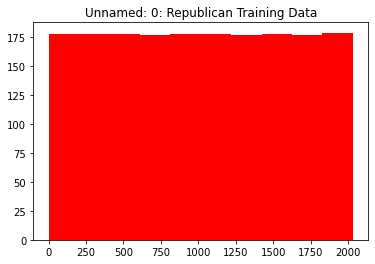

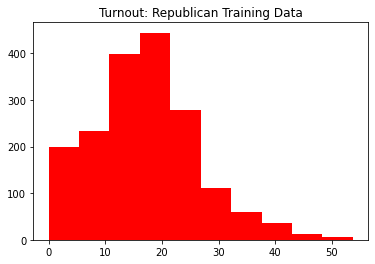

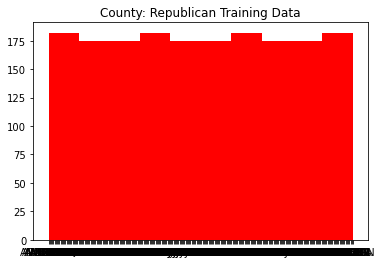

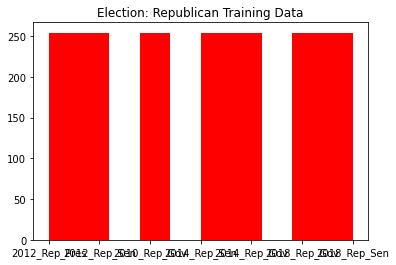

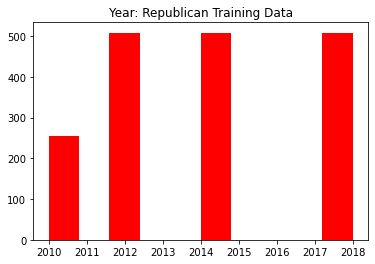

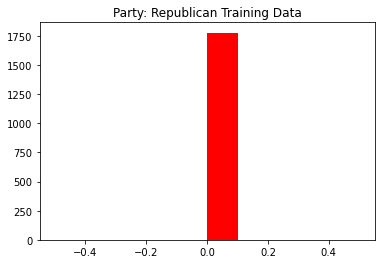

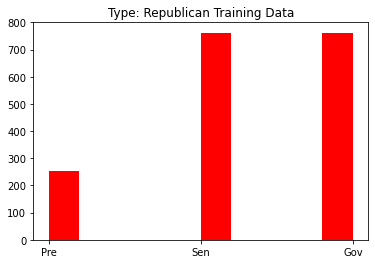

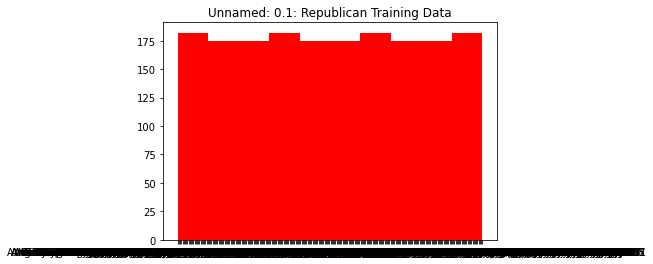

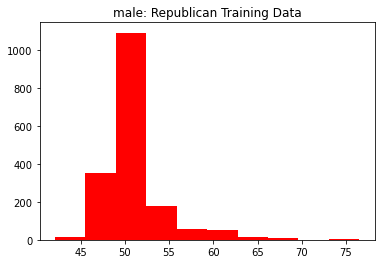

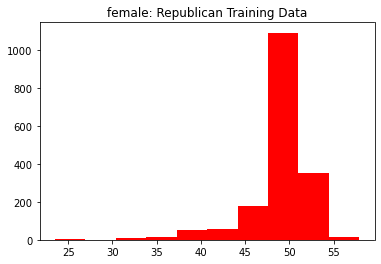

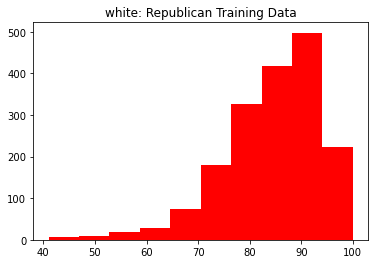

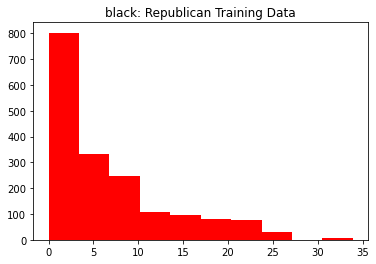

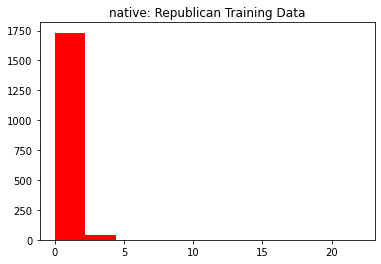

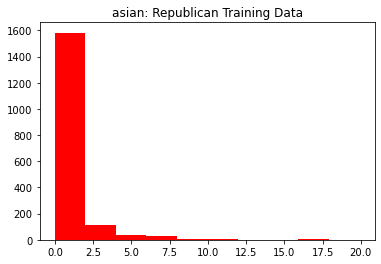

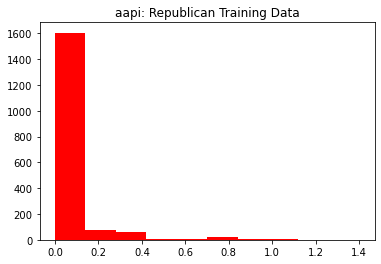

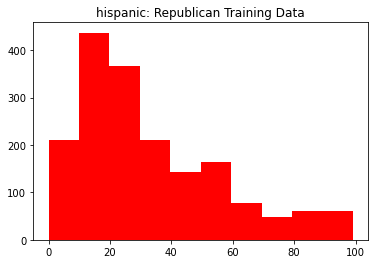

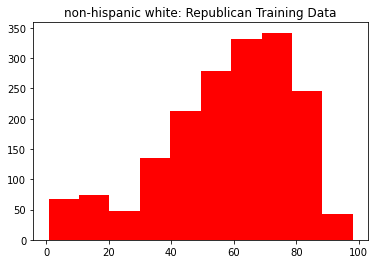

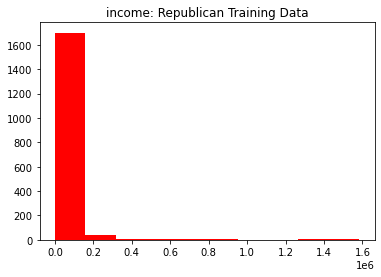

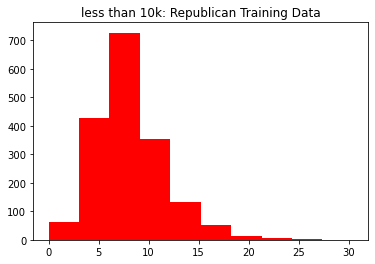

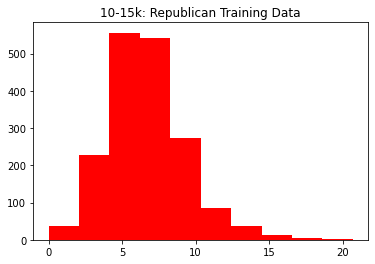

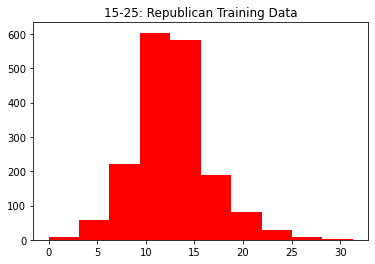

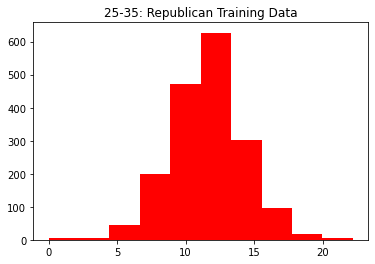

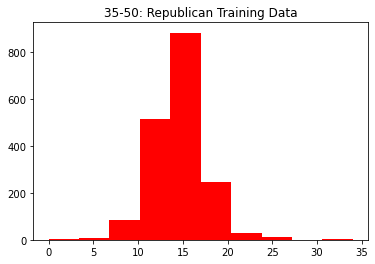

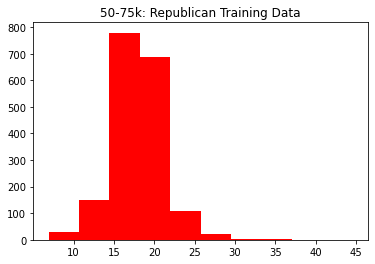

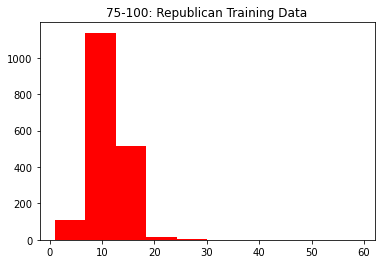

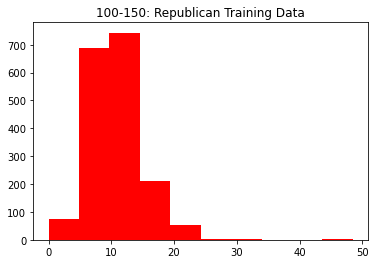

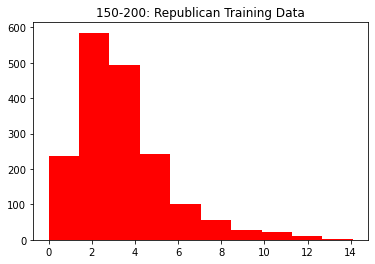

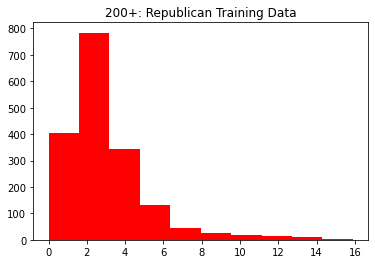

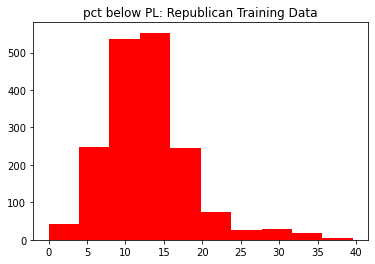

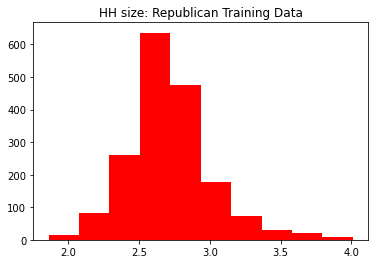

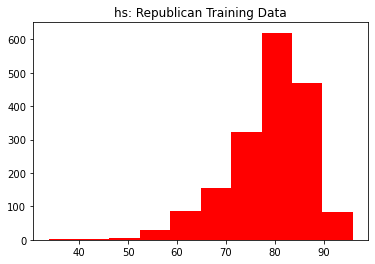

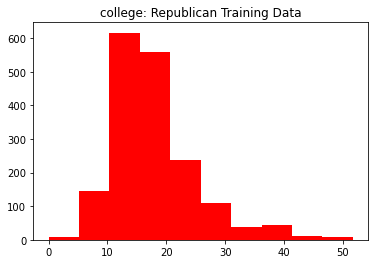

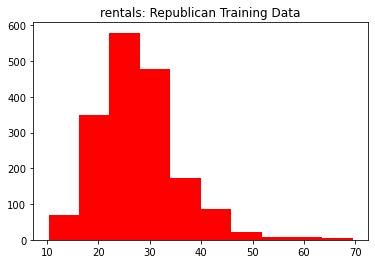

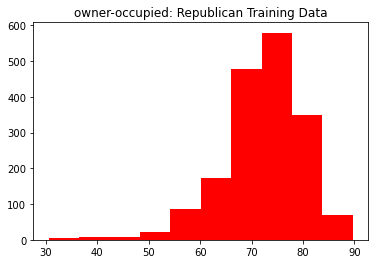

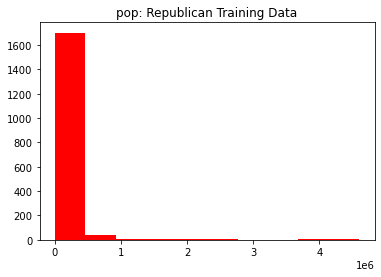

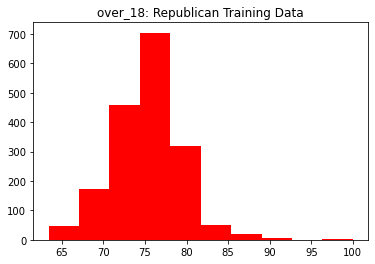

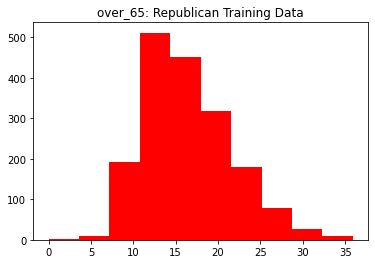

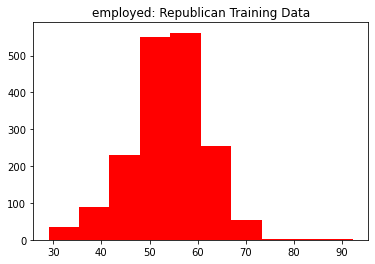

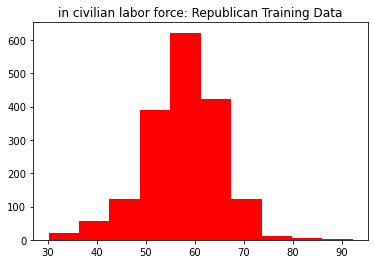

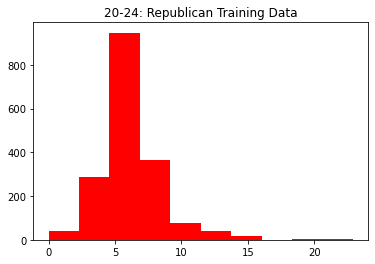

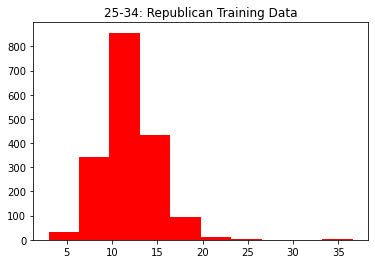

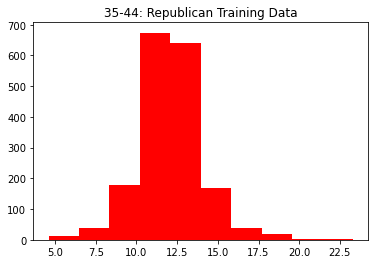

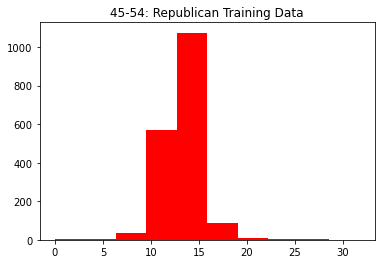

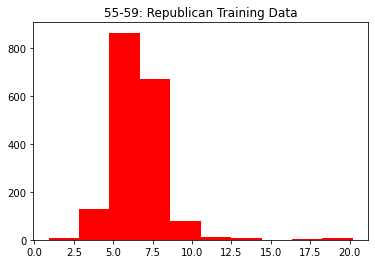

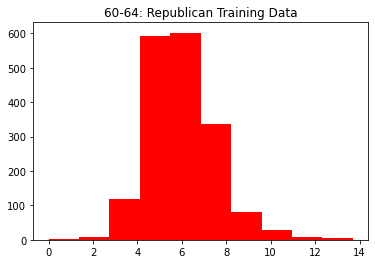

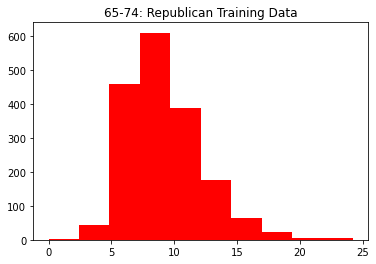

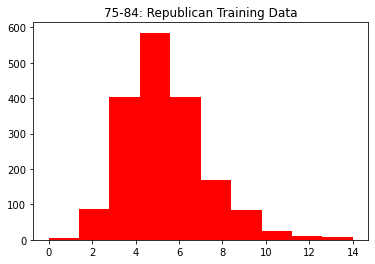

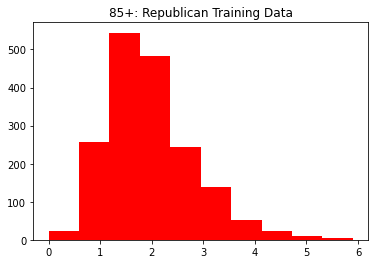

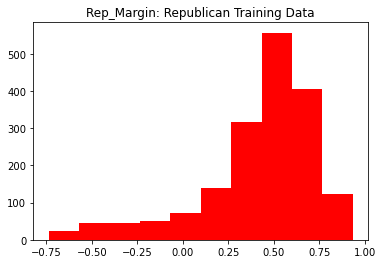

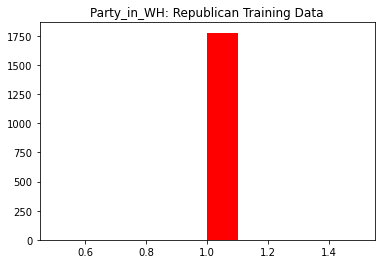

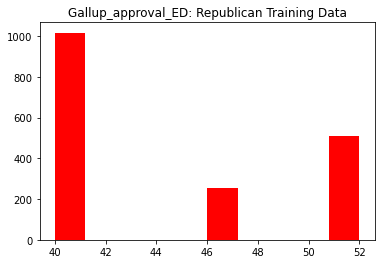

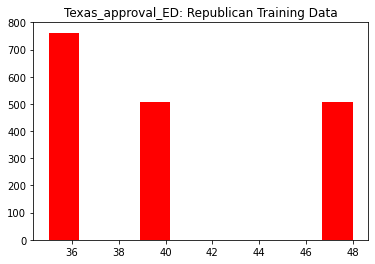

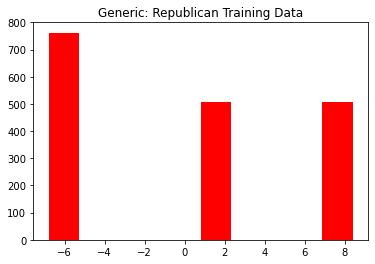

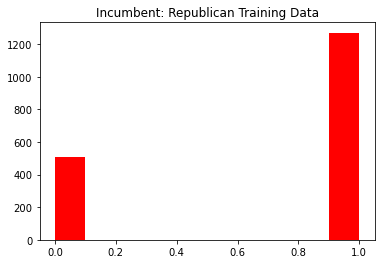

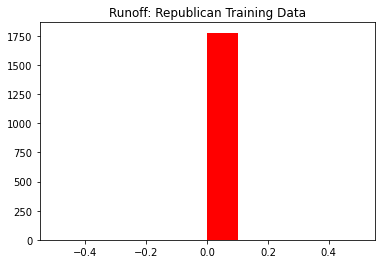

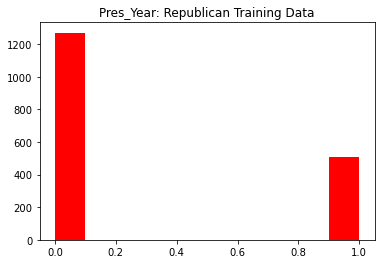

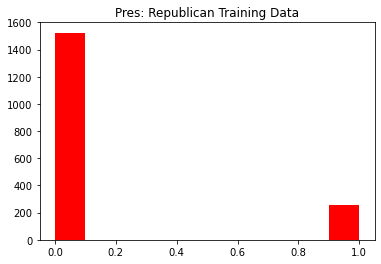

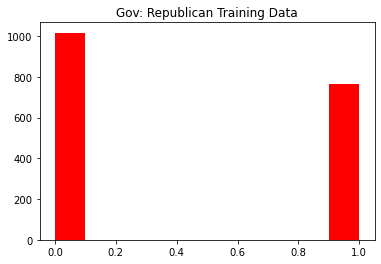

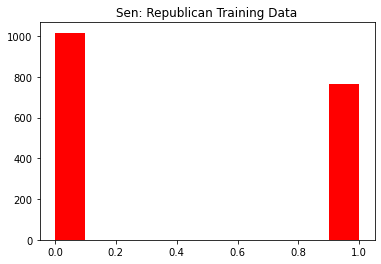

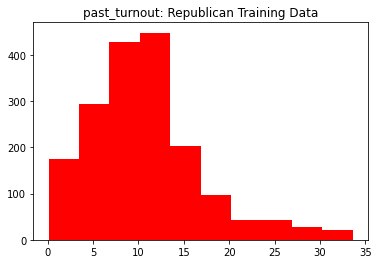

In [318]:
#generate histograms of Republican data features

#filter out 2018 test data
turnout_train_rep_use = turnout_train_rep[turnout_train_rep['Year'] != 2018]
feats = turnout_train_rep_use.columns

for f in feats:
    turnout_train_rep[f].hist(bins=None, color = 'red') 
    plt.title(f + ": Republican Training Data")
    plt.grid(False)
    plt.show()


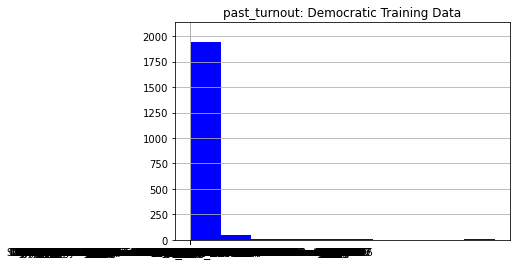

In [305]:
#generate histograms of Democratic data features
turnout_train_dem_use = turnout_train_dem[turnout_train_dem['Year'] != 2018]

#filter out 2018 test data
feats = turnout_train_dem_use.columns

for f in feats:
    turnout_train_dem[f].hist(bins=None, color = 'blue') 
    plt.title(f + ": Democratic Training Data")



R^2:
0.22308676503116298
Coefficient
-0.18932130040017758


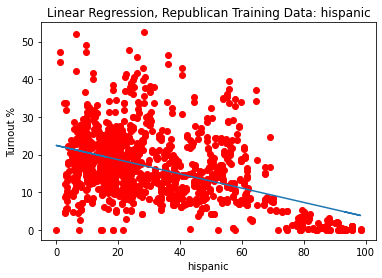

R^2:
0.32805162131890475
Coefficient
0.2500792844883512


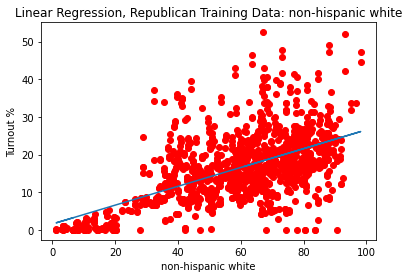

R^2:
0.15172368976086237
Coefficient
-0.9855893636904093


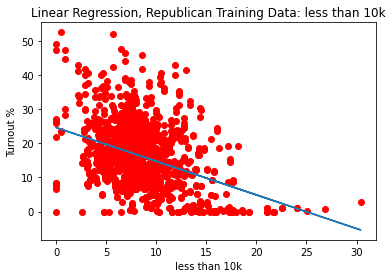

R^2:
0.1778807532597405
Coefficient
-0.6754389647003478


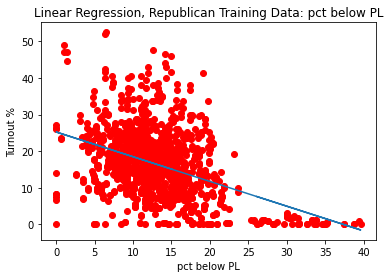

R^2:
0.11727335896269331
Coefficient
-11.027150259736992


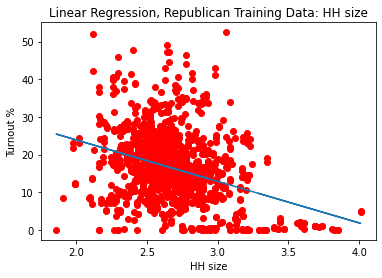

R^2:
0.1475381517888117
Coefficient
0.4344122087925737


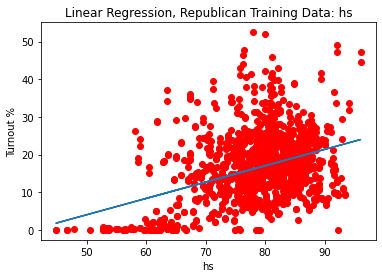

R^2:
0.5103263647152796
Coefficient
21.477568260573396


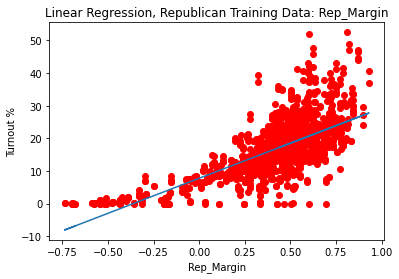

R^2:
0.5685722282083896
Coefficient
1.1016392830774813


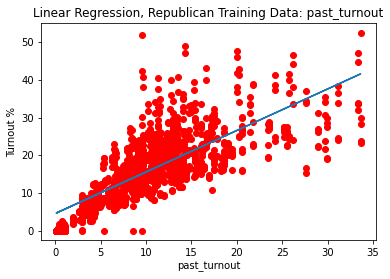

In [312]:
#Single Feature Linear Regression: Republican primary


np.random.seed(5)


#filter out 2018 test data
turnout_train_rep_mod = turnout_train_rep[turnout_train_rep['Year'] != 2018]



#drop columns
model_feats = turnout_train_rep_mod.drop(['Unnamed: 0','Unnamed: 0.1', 'County', 'Election', 'Turnout','Party', 'Type', 'Runoff'], axis = 1)
#specify outcome
model_outcome = turnout_train_rep_mod['Turnout']


for col in model_feats:
    x = model_feats[col]
    x = np.array(x)
    x = x[:,None]
    lm = LinearRegression()
    lm.fit(X=x, y=model_outcome)
    a1 = lm.coef_[0]
    a0 = lm.intercept_
    y_pred = a1*x + a0
    score = r2_score(model_outcome, y_pred)
    #set threshold for R^2
    if score >= .095:
        print("R^2:")
        print(r2_score(model_outcome, y_pred))
        print("Coefficient")
        print(a1)
        plt.plot(x, model_outcome, 'o', color = 'red')
        plt.plot(x, a1*x + a0)
        plt.xlabel(col)
        plt.ylabel("Turnout %")
        plt.title("Linear Regression, Republican Training Data: " + col)
        plt.show()

   
   

R^2:
0.2915051433555401
Coefficient
0.1837902328963749


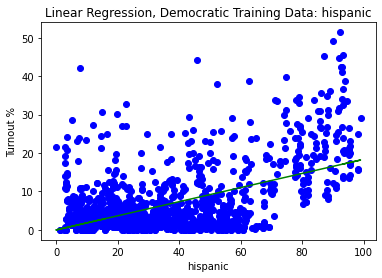

R^2:
0.2870346081626306
Coefficient
-0.1988638383396182


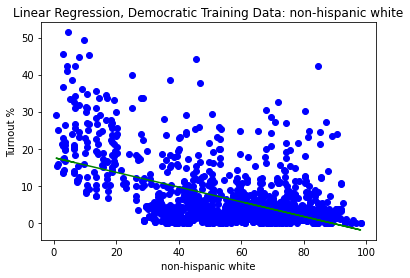

R^2:
0.2076618659907955
Coefficient
0.9898933346375353


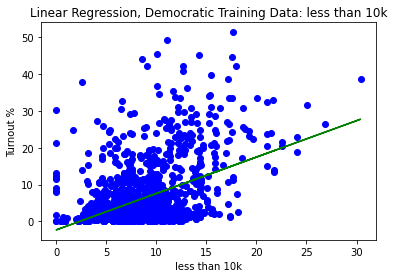

R^2:
0.11990885388853245
Coefficient
1.027638100980438


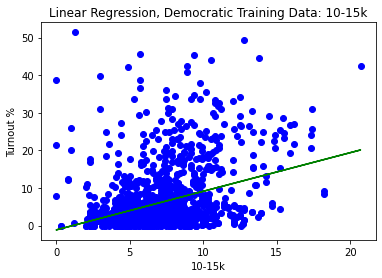

R^2:
0.1626032164166451
Coefficient
0.5532611390988872


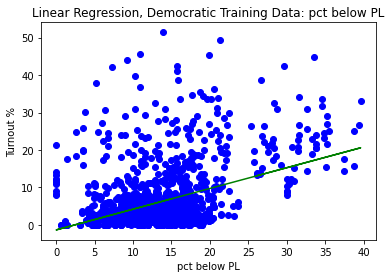

R^2:
0.2241839652075306
Coefficient
-0.4549717305539803


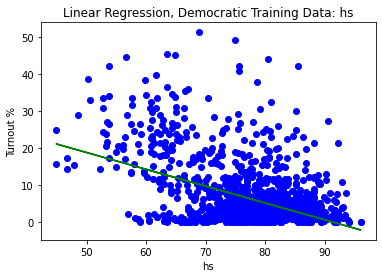

R^2:
0.45486722584012396
Coefficient
-17.09575347799273


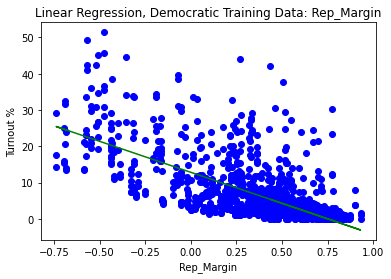

R^2:
0.5409370916810863
Coefficient
0.7726829841469647


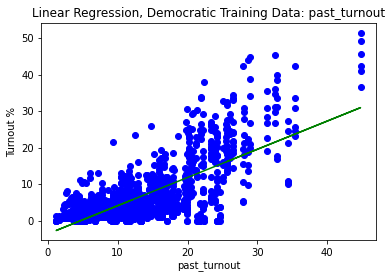

In [313]:
#Single Feature Linear Regression: Democratic primary
np.random.seed(5)
#filter out 2018 test data
turnout_train_dem_mod = turnout_train_dem[turnout_train_dem['Year'] != 2018]
#drop columns
model_feats = turnout_train_dem_mod.drop(['Unnamed: 0','Unnamed: 0.1', 'County', 'Election', 'Turnout','Party', 'Type', 'Runoff'], axis = 1)
#specify outcome
model_outcome = turnout_train_dem_mod['Turnout']





for col in model_feats:
    x = model_feats[col]
    x = np.array(x)
    x = x[:,None]
    lm = LinearRegression()
    lm.fit(X=x, y=model_outcome)
    a1 = lm.coef_[0]
    a0 = lm.intercept_
    y_pred = a1*x + a0
    score = r2_score(model_outcome, y_pred)
    #set threshold for R^2
    if score >= .095:
        print("R^2:")
        print(r2_score(model_outcome, y_pred))
        print("Coefficient")
        print(a1)
        plt.plot(x, model_outcome, 'o', color = 'blue')
        plt.plot(x, a1*x + a0, color = 'green')
        plt.xlabel(col)
        plt.ylabel("Turnout %")
        plt.title("Linear Regression, Democratic Training Data: " + col)
        plt.show()

    


In [308]:
#Plot primary turnout over time

#Read in primary history data

history_dem = pd.read_csv('history_dem.csv')

history_rep = pd.read_csv('history_rep.csv')

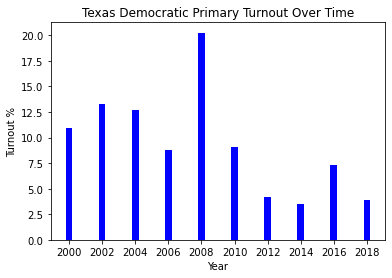

<Figure size 720x360 with 0 Axes>

In [315]:
#Plot Dem primary turnout over time

turnout_train_mean = history_dem['Turnout'].groupby(history_dem['Year']).mean()
turnout_train_mean = pd.DataFrame(turnout_train_mean)
turnout_train_mean['Year'] = turnout_train_mean.index
turnout_train_mean = turnout_train_mean[turnout_train_mean['Year'] >= 2000]
turnout_train_mean = turnout_train_mean.set_axis(['Turnout', 'Year'], axis=1, inplace=False)

# creating the bar plot
plt.bar(turnout_train_mean['Year'], turnout_train_mean['Turnout'], color ='blue',
        width = 0.4)
 
plt.xlabel("Year")
plt.ylabel("Turnout %")
plt.title("Texas Democratic Primary Turnout Over Time")
plt.xticks(np.arange(2000, max(turnout_train_mean['Year']) + 2, 2))
fig = plt.figure(figsize = (10, 5))
plt.show()


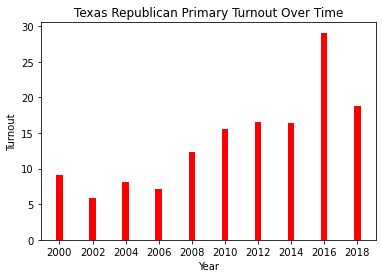

In [314]:
#Plot Rep primary turnout over time

turnout_train_mean = history_rep['Turnout'].groupby(history_rep['Year']).mean()
turnout_train_mean = pd.DataFrame(turnout_train_mean)
turnout_train_mean['Year'] = turnout_train_mean.index
turnout_train_mean = turnout_train_mean[turnout_train_mean['Year'] >= 2000]
turnout_train_mean = turnout_train_mean.set_axis(['Turnout', 'Year'], axis=1, inplace=False)


# creating the bar plot
plt.bar(turnout_train_mean['Year'], turnout_train_mean['Turnout'], color ='red',
        width = 0.4)
 
plt.xlabel("Year")
plt.ylabel("Turnout")
plt.title("Texas Republican Primary Turnout Over Time")
plt.xticks(np.arange(min(turnout_train_mean['Year']), max(turnout_train_mean['Year']) + 2, 2))
plt.show()

